In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.font_manager as fm
from selenium import webdriver
from urllib.parse import quote_plus
from urllib.request import urlopen
import os
import re
from selenium.webdriver.common.by import By
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [ ]:
# 입력
alco_type = '막걸리'

x_all = ['탄산', '단|달', '색|탁도', '향', '끝맛', '가성비', '산미','걸쭉','부드러움']
y_all = x_all

['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']
['배상면주가 느린마을 막걸리 6도 750ml', '복순도가 손막걸리 6.5도 935ml', '죽향도가 죽향 생 막걸리 6도 750ml', '한강주조 표문 막걸리 6도 500ml']


IndexError: list index out of range

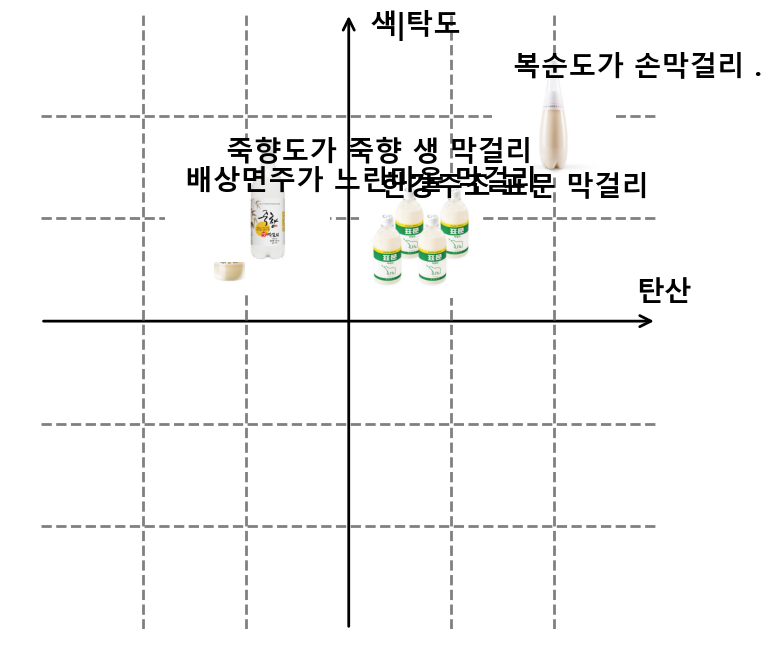

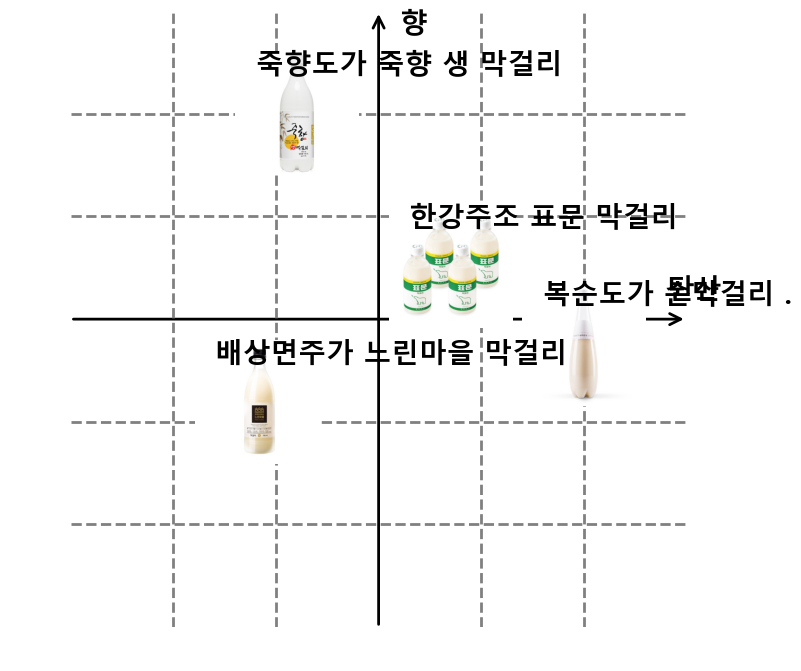

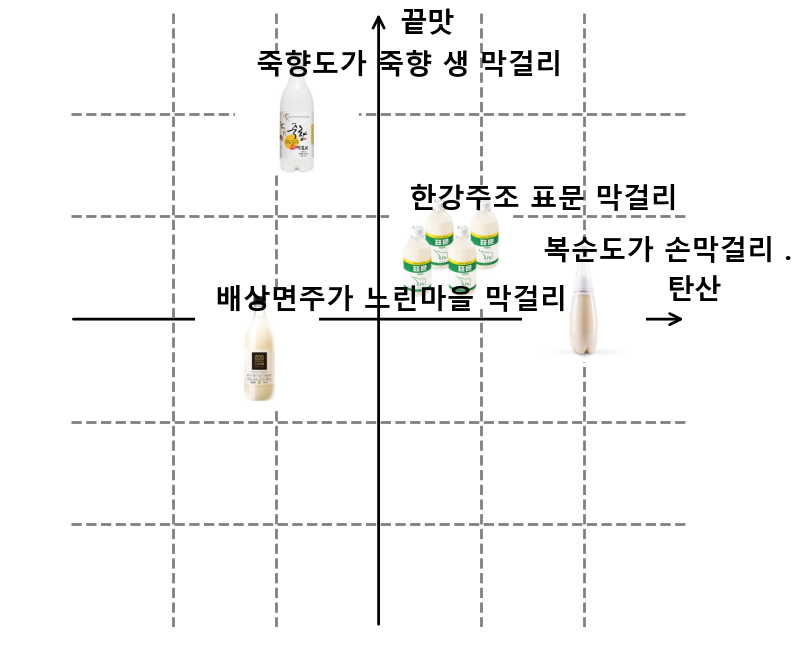

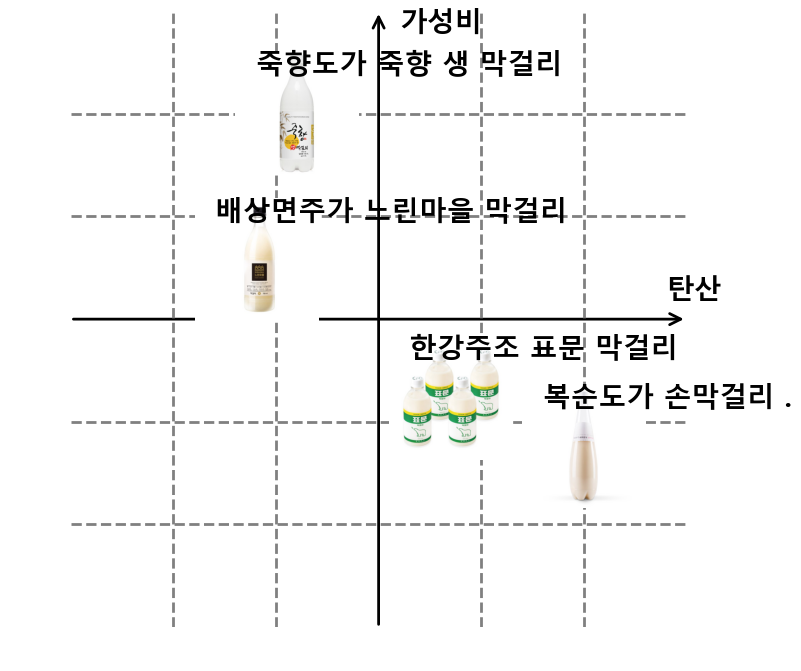

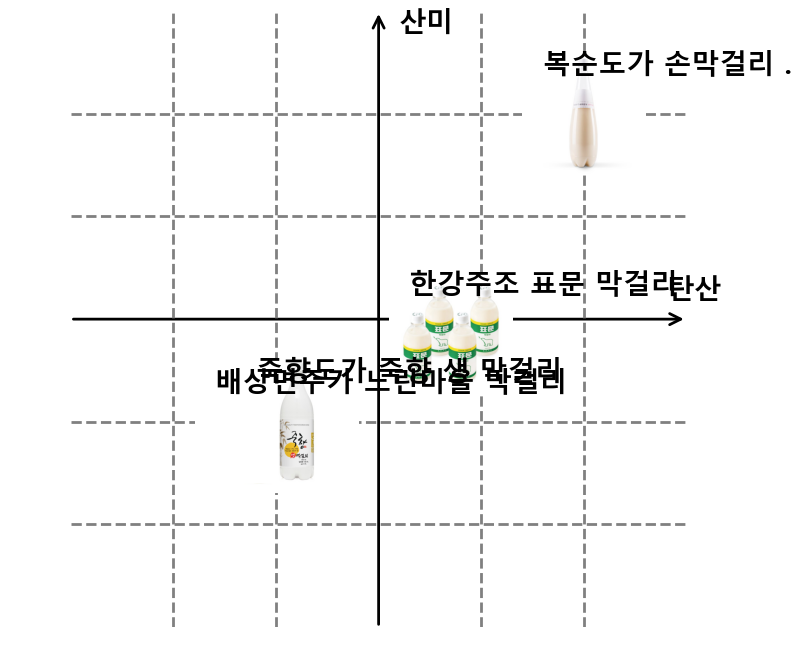

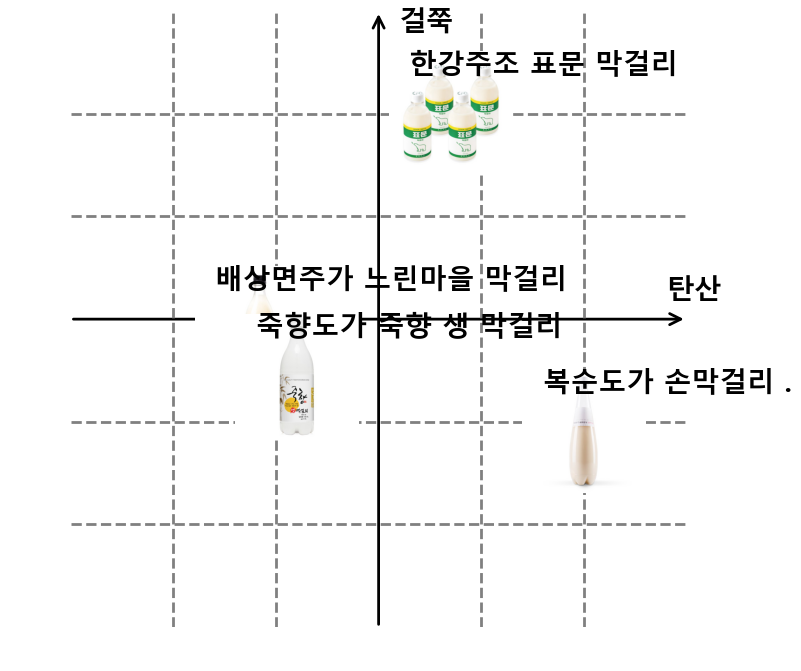

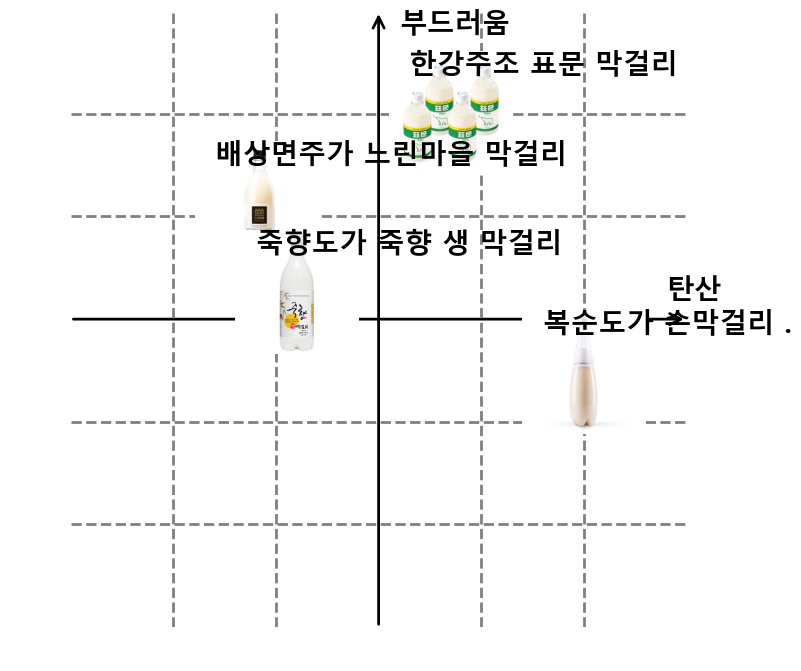

In [ ]:
for i in range(len(x_all)):
    x_text = x_all[i]
    for k in range((i+1), (len(x_all))):
        y_text = y_all[k]

        scaler1 = MinMaxScaler()
        scaler2 = MinMaxScaler()

        os.chdir(f'alcohol_images/{alco_type}')
        name_list=os.listdir()
        os.chdir('..')
        os.chdir('..')
        print(name_list)
        
        target_list = name_list
        
        x_list = []
        y_list = []
        for name in name_list:
            data = pd.read_csv(f"alcohol_crawling/{alco_type}/{name}.csv", encoding='utf-8-sig')
            data.drop_duplicates(['text'],ignore_index=True, inplace=True) # 중복 제거
            data.dropna(inplace=True)
            # globals()[f"{name}"]
            x_list.append(len(data[data.text.str.contains(x_text)])/len(data))
            y_list.append(len(data[data.text.str.contains(y_text)])/len(data))
        x_list.append(0)
        y_list.append(0)

        x = np.array(x_list).reshape(-1,1)
        y = np.array(y_list).reshape(-1,1)

        scaled_x = scaler1.fit_transform(x)
        scaled_y = scaler1.fit_transform(y)

        plt.rcParams['axes.unicode_minus'] = False

        font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()

        plt.rc('font', family=font_name) 
        plt.rcParams["figure.figsize"] = (8, 8)

        font = {'family' : font_name,
                'weight' : 'bold',
                'size'   : 20}


        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot()
        ax.plot()
        ax.patch.set_facecolor('#FFFFFF') ## axes 배경색

        #보노보노 넣고 싶으면
        #img = plt.imread("alcohol_images/bono.jpg")
        #ax.imshow(img, extent=[-0.25, 1.25, -0.25, 1.25])

        plt.rc('font', **font)
        plt.xlim(-0.25,1.25)
        plt.ylim(-0.25,1.25)
        plt.text(1.2,0.55,x_text)
        plt.text(0.55,1.2,y_text)
        plt.annotate('',
                     ha = 'center', va = 'bottom',
                     xytext = (-0.25, 0.5),
                     xy = (1.25, 0.5),
                     zorder=0,
                     arrowprops = {'edgecolor':'black', 
                      'arrowstyle':'->',
                      'lw' : 2
                      })

        plt.annotate('',
                     ha = 'center', va = 'bottom',
                     xytext = (0.5, -0.25),
                     xy = (0.5, 1.25),
                     zorder=0,
                     arrowprops = {'edgecolor':'black', 
                      'arrowstyle':'->',
                      'lw' : 2
                      })
        plt.xticks([0,0.25,0.75,1], alpha=0)
        plt.yticks([0,0.25,0.75,1], alpha=0)
        plt.tick_params(axis='both', length=0)

        plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
        plt.gca().spines['top'].set_visible(False) #위 테두리 제거
        plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
        plt.gca().spines['bottom'].set_visible(False)
        plt.grid(True, color='gray', alpha=1, linestyle='--', lw=2,zorder=0)

        display_list = []
        for i in range(len(target_list)):
            display = (re.sub(r"[a-z]", "",(re.sub(r"[0-9]", "", re.sub(r"[0-9]도", "", target_list[i]))))).rstrip()
            display_list.append(display)

        for i in range(len(target_list)):
            target_index = name_list.index(target_list[i])
            target_x = scaled_x[target_index]
            target_y = scaled_y[target_index]
            plt.scatter(target_x,target_y)
            img = mpimg.imread(f"alcohol_images/{alco_type}/{target_list[i]}/1.jpg")
            plt.imshow(img,extent=[target_x[0]-0.15, target_x[0]+0.15, target_y[0]-0.15, target_y[0]+0.15],zorder=2)
            plt.text(target_x-0.1, target_y+0.1, display_list[target_index])

        plt.savefig(f'alcohol_positioning/{alco_type}/{x_text.replace("|"," ")}_{y_text.replace("|"," ")}.png')